# Introduction:
We will analyze arrest data by neighborhood, and figure out the best neighborhood to avoid being arrested in.

Dataset: https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

### Importing Pandas, Matplotlib, and Geopandas

In [45]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

### Establishing the Dataset for Arrests per Neighborhood:

In [2]:
arrestsData = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")

### Checking for Usable Values:
Found the neighborhood identifier called: **"INCIDENTLOCATION"**

In [3]:
arrestsData.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


### Made sure that there data for neighborhoods is usable:

In [37]:
print(len(arrestsData['INCIDENTNEIGHBORHOOD'].unique()))
arrestsData['INCIDENTNEIGHBORHOOD'].unique()

99


array(['Bloomfield', 'Outside City', 'Westwood', 'East Allegheny',
       'Crafton Heights', 'Greenfield', 'Brookline', 'Regent Square',
       'East Liberty', nan, 'East Hills', 'Carrick', 'Allegheny Center',
       'South Side Flats', 'Sheraden', 'East Carnegie',
       'Golden Triangle/Civic Arena', 'Point Breeze North', 'Perry South',
       'Allentown', 'North Shore', 'Marshall-Shadeland',
       'Central Oakland', 'Middle Hill', 'Strip District',
       'Lincoln-Lemington-Belmar', 'Central Northside',
       'Troy Hill-Herrs Island', 'Highland Park', 'Homewood North',
       'Northview Heights', 'Brighton Heights', 'Hazelwood',
       'Perry North', 'Bedford Dwellings', 'Elliott', 'Beechview',
       'Fineview', 'Glen Hazel', 'Spring Hill-City View', 'Bluff',
       'Manchester', 'Homewood West', 'Outside County', 'Point Breeze',
       'Homewood South', 'Squirrel Hill South', 'Terrace Village',
       'Upper Lawrenceville', 'Arlington', 'South Side Slopes',
       'Lower Lawrenc

### Creating a new Dataset:
I used panda's **"groupby"** function to create a new dataset that matches each neighborhood to it's total times referenced in the orginal dataset.

Then, I **sorted** the new dataset by the associated values to find the highest amount of incidents and the lowest amount of incidents.

In [78]:
incidents_per_neighborhood = arrestsData.groupby('INCIDENTNEIGHBORHOOD')['AGE'].count()
incidents_per_neighborhood.sort_values(ascending = False)

INCIDENTNEIGHBORHOOD
Central Business District    3532
South Side Flats             3012
Carrick                      2082
East Allegheny               1889
Homewood South               1856
                             ... 
Regent Square                  32
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: AGE, Length: 98, dtype: int64

### Using Geopandas:
Next, I loaded in the neighborhoods map object.

In [79]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

### Merging data into the map:
I combined the data from the map and from the dataset to create a map which associates the number of incidents with the neighborhood.

In [82]:
steps_map = neighborhoods.merge(incidents_per_neighborhood, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
steps_map[['hood','AGE','geometry']].head()

,hood,AGE,geometry
0,Central Oakland,466.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,386.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,273.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,726.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,439.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


### Creating the Map:
Here, I used the mapping feature of geopandas to create a **choropleth map** which is darker in higher arrests areas.

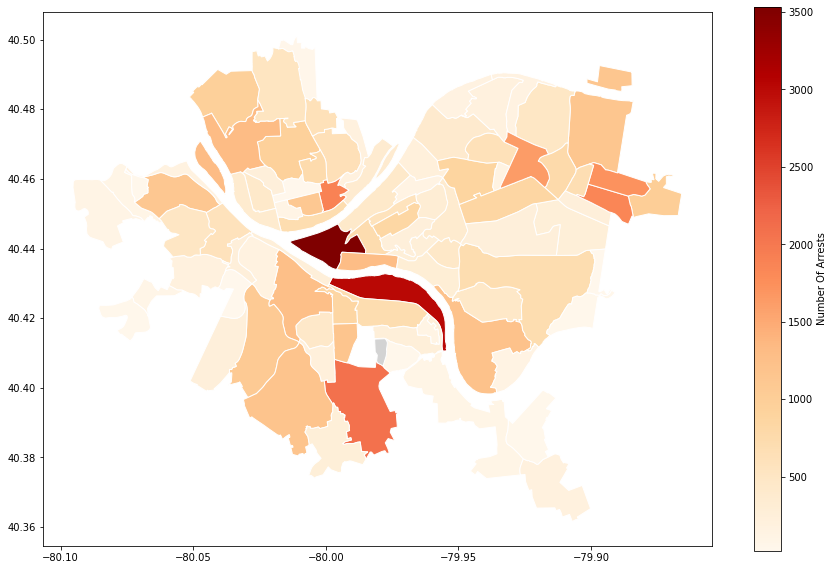

In [83]:
steps_map.plot(column='AGE', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number Of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

# Explanation:
The above map represents the number of arrests by neighborhood.
The results of the calculations show that:
* You are **most** likely to be arrested in: "Central Business District"
* You are **least** likely to be arrested in: "Mt. Oliver Neighborhood"